# Network Visualisation

This is a brief aside with the goal of generating/figuring out how to generate some nice plotly plots to represent our supply chain problems. (Will look good in a presentation)

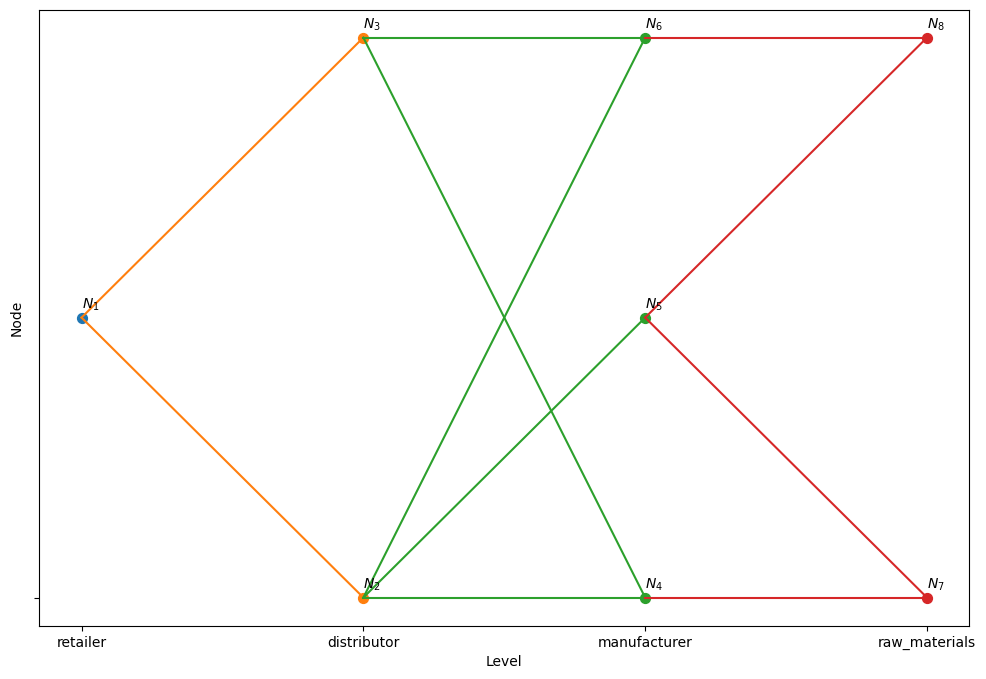

In [29]:
import or_gym 

env = or_gym.create_env('NetworkManagement-v1')
env.plot_network(env())

### Lets create a complex network

9


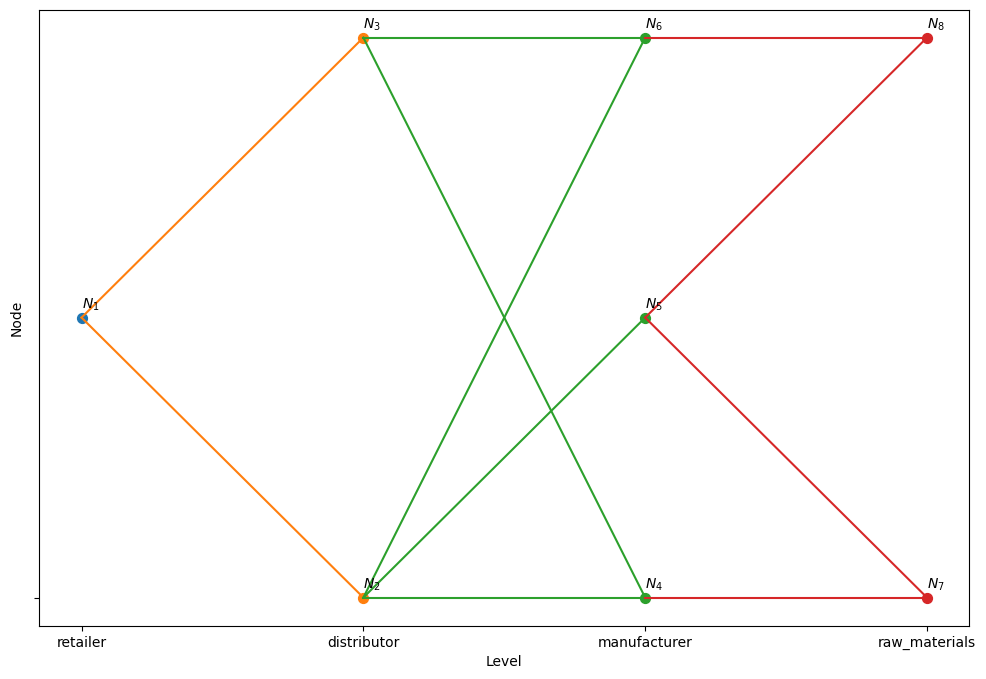

In [27]:
env_complex = or_gym.create_env('NetworkManagement-v1')


env_complex().graph.add_nodes_from([9])
env_complex().graph.add_edges_from([
                                   (9,5,{'L': 1,
                                         'p': 0.040,
                                         'g': 0.005})])

print(env_complex().num_nodes)


env_complex.plot_network(env_complex())


## Archive

In [1]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

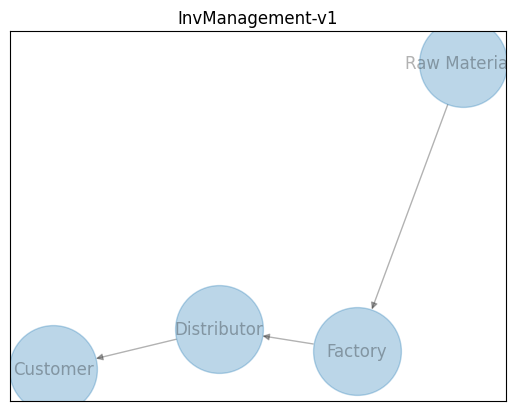

In [36]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# ------- DIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['Raw Materials', 'Factory', 'Distributor'], 'to':['Factory', 'Distributor', 'Customer']})
 
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw_networkx(G, with_labels=True, node_size=4000, alpha=0.3, arrows=True)
plt.title("InvManagement-v1")
plt.show()



nx.line_graph(G)

 

### Simple

In [85]:
G = nx.Graph()

In [84]:
list(G.nodes)

[('Raw Materials', 'Factory'), ('Factory', 'Distribution')]

In [76]:
# G.add_node("Raw Materials")
# G.add_node("Factory")
# G.add_node("Distribution")
# G.add_node("Customer Demand")

In [77]:
list(G.nodes)

['Raw Materials', 'Factory', 'Distribution', 'Customer Demand']

In [60]:
G.edges

EdgeView([])

In [86]:
G.add_edge(1, 2)
G.add_edge(2, 3)

NetworkXError: Node (1, 2) has no position.

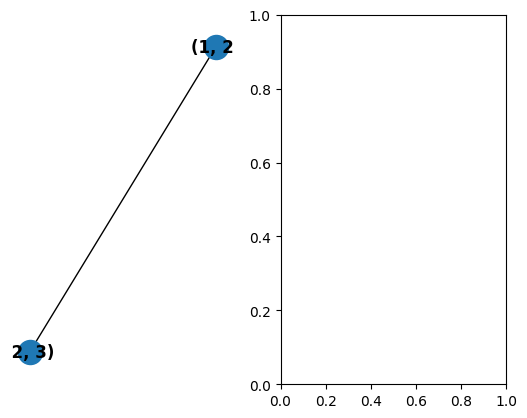

In [87]:
G = nx.line_graph(G)
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
ubax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')